<a href="https://colab.research.google.com/github/hoangnuthuphuong/python/blob/Phuong/Chuong3_HoiQuyTuyenTinhDaBien/C3_BTVN2_TienXuLyDuLieu_HQTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phương pháp điều chỉnh giá trị dữ liệu (data scaling)**.
Một cách tổng quát, phương pháp điều chỉnh dữ liệu (data scaling) có thể xem là:

$f(X): R^{m×n} → R^{m×n}$

Với hàm f(x) có nhiều định nghĩa khác nhau như:
- **Chuẩn hóa dữ liệu (Data normalization)** là thao tác đưa các giá trị của tập dữ liệu ban đầu về khoảng [0,1]: $x_i =\frac{x_i−min}{max − min}$ (Trong scikit-learn, hàm tương đương là **MinMaxScaler**);
- **Chuẩn hóa dữ liệu theo phương pháp điều chỉnh hướng tâm (center scaling)** được định nghĩa là: $x_i =\frac{x_i− x̅}{δ}$ với $\frac{1}{m} \sum_{i=1}^m x_i$
 và $δ = √\frac{∑{(x_i−x̅)}^2}{m}$ (Trong scikit-learn, hàm tương đương là **StandardScaler**)

**Quy tắc điều chỉnh dữ liệu khi sử dụng sklearn là:**
- Bước 1: Khởi tạo bộ điều chỉnh dữ liệu
- Bước 2: Đưa dữ liệu vào bộ điều chỉnh thông qua hàm **fit()**
- Bước 3: Thực hiện điều chỉnh dữ liệu bằng hàm **transform()**

# **Xây dựng mô hình HQTT đa biến với thuật toán tối ưu là Gradient Descent có sử dụng phương pháp tiền xử lý dữ liệu do sklearn cung cấp.**

In [77]:
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
# Hàm đọc dữ liệu từ tập tin 
def readData(folder, filename):

    # Trích xuất tệp dữ liệu gốc
    data = np.loadtxt(os.path.join(folder, filename), delimiter=',')
    print('Original data shape', data.shape)
    X = data[:,:-1]
    print('X shape: ', X.shape)
    y = data[:,-1]
    print('y shape: ', y.shape)
    m = X.shape[0]
    print('Number of training examples m = ', m)
    x0 = np.ones((m,1))
    X = np.hstack([x0, X]) 
    print('Modified X shape: ', X.shape)
    y = np.reshape(y, (m,1))
    print('Modified y shape: ', y.shape)
    return X, y



In [73]:
def featureVectorScaling(data):
    #Khởi tạo bộ điều chỉnh dữ liệu
    scaler = MinMaxScaler()
    #Phải thực hiện thao tác fit(data) trước khi điều chỉnh dữ liệu
    scaler.fit(data)
    #Thực hiện điều chỉnh dữ liệu
    data_scl = scaler.transform(data)
    print(data_scl[1])
    return data_scl


In [74]:
# Hàm scale dữ liệu
def scaleData(X, y):
    #Khởi tạo bộ điều chỉnh dữ liệu
    scaler = MinMaxScaler()
    #Phải thực hiện thao tác fit(data) trước khi điều chỉnh dữ liệu
    scaler.fit(data)
    #Thực hiện điều chỉnh dữ liệu
    data_scl = scaler.transform(data)
    print('Kích thước của tập dữ liệu: ', data.shape)
    print('Giá trị của tập dữ liệu: ')
    print(data)
    print('Lấy ra tập dữ liệu X, y')
    X_scl, y_scl = data[:,:-1], data[:, -1]
    print('Kích thước tập X: ', X.shape)
    print('Kích thước vector y: ', y.shape)
    return X_scl, y_scl


In [75]:
# Hàm mất mát 
def computeLoss(X, y, w):
    m = y.shape[0]
    J = 0
    h = np.dot(X, w)
    J = (1/(2*m))*np.sum(np.square(h - y))
    return J

In [76]:
# Hàm Gradient Descent
def gradientDescent(X, y, w, alpha, n):
    m = y.shape[0]
    J_history = []
    w_optimal = w.copy()
    print('w_optimal shape: ', w_optimal.shape)
    for i in range(n):
        h = np.dot(X, w_optimal)
        error = h - y
        w_optimal = w_optimal - (alpha/m)*np.dot(X.T, error)
        J_history.append(computeLoss(X, y, w_optimal))
    return w_optimal, J_history

In [83]:
# Mô tả dữ liệu bằng plot 
def visualizeDataAndModel(X, y, w_optimal):
    fig = plt.figure()
    plt.plot(X[:,1], y, 'g^')
    plt.plot(X[:, 1], np.dot(X, w_optimal), 'r-')
    plt.show()

Original data shape (97, 2)
X shape:  (97, 1)
y shape:  (97,)
Number of training examples m =  97
Modified X shape:  (97, 2)
Modified y shape:  (97, 1)
Kích thước của tập dữ liệu:  (97, 2)
Giá trị của tập dữ liệu: 
[[6.30643743e-02 7.55662990e-01]
 [2.91567935e-02 4.40250189e-01]
 [2.03288290e-01 6.09172609e-01]
 [1.15061044e-01 5.41779579e-01]
 [4.84917997e-02 3.54260708e-01]
 [1.95387777e-01 5.42972376e-01]
 [1.42610954e-01 2.62005315e-01]
 [2.06752406e-01 5.47221715e-01]
 [8.49610796e-02 3.45888764e-01]
 [1.61270603e-03 2.42186248e-01]
 [3.98111329e-02 2.21148291e-01]
 [5.31965929e-01 6.77870261e-01]
 [4.11676690e-02 2.17528897e-01]
 [1.96872398e-01 3.69263858e-01]
 [3.57357025e-02 1.26618383e-01]
 [2.05227031e-02 2.30865859e-01]
 [7.79280512e-02 2.97658763e-01]
 [6.00834881e-03 1.20825490e-01]
 [8.16658031e-02 2.36043343e-01]
 [1.18996745e-01 3.00808493e-01]
 [6.76637886e-02 2.16913861e-01]
 [8.87459901e-01 9.11285723e-01]
 [2.69677051e-02 2.58825766e-01]
 [7.56399881e-02 2.9328641

ValueError: ignored

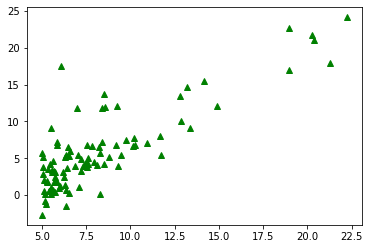

In [84]:
def main():
    n = 1500
    alpha = 0.01
    X, y = readData("/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở", "ex1data1.txt")
    X_scl, y_scl = scaleData(X, y)
    print('X scl: ', X_scl[1,:])
    print('y scl: ', y_scl[1])
    w = np.zeros((X_scl.shape[1], 1))
    w, J_history = gradientDescent(X_scl, y_scl, w, alpha, n)
    print("Optimal weights are: ", w)
    print("Loss function: ", J_history[-1])
    visualizeDataAndModel(X, y, w)

if __name__ == '__main__':
    main()